In [11]:
import pandas as pd

df = pd.read_csv("../DataSet.csv")
df

,Profile Pic,Nums/Length Username,Full Name Words,Bio Length,External Url,Private,Verified,Business,#Posts,#Followers,#Following,Fake
0,1,0.000,2,42,1,0,0,0,102,678,405,0
1,1,0.067,2,0,0,0,0,0,58,334,434,0
2,1,0.000,0,0,0,0,0,0,44,539,364,0
3,1,0.000,2,14,0,0,0,0,188,3098,286,0
4,1,0.000,2,0,0,0,0,1,496,1079,1979,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1,0.000,2,2,0,1,0,0,8,661,1562,1
1196,0,0.000,0,0,0,0,0,0,0,2,223,1
1197,1,0.000,2,58,0,1,0,0,47,296,4909,1
1198,1,0.143,1,0,0,1,0,0,0,5,67,1


In [12]:
X=df.iloc[:, 0:11].values
X

array([[1.000e+00, 0.000e+00, 2.000e+00, ..., 1.020e+02, 6.780e+02,
        4.050e+02],
       [1.000e+00, 6.700e-02, 2.000e+00, ..., 5.800e+01, 3.340e+02,
        4.340e+02],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 4.400e+01, 5.390e+02,
        3.640e+02],
       ...,
       [1.000e+00, 0.000e+00, 2.000e+00, ..., 4.700e+01, 2.960e+02,
        4.909e+03],
       [1.000e+00, 1.430e-01, 1.000e+00, ..., 0.000e+00, 5.000e+00,
        6.700e+01],
       [1.000e+00, 0.000e+00, 1.000e+00, ..., 3.000e+00, 8.100e+01,
        6.108e+03]])

In [13]:
y=df[['Fake']]
y

,Fake
0,0
1,0
2,0
3,0
4,0
...,...
1195,1
1196,1
1197,1
1198,1


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

804 804
396 396


In [15]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)

In [16]:
clf.fit(X_train, y_train.values.ravel()) 

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=0)

In [17]:
print("TRAIN SET", clf.score(X_train, y_train))
print("TEST  SET", clf.score(X_test, y_test))

TRAIN SET 1.0
TEST  SET 0.9772727272727273


In [18]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(clf, X, y.values.ravel(), cv=4))

[0.95666667 0.97333333 0.95       0.94666667]


In [19]:
print("Errori in training set")
predictions = clf.predict(X_train)
for elem, prediction, label in zip(X_train, predictions, y_train):
  if prediction != label:
    print(elem, 'has been classified as ', prediction, 'and should be ', label) 

Errori in training set
[1.00e+00 1.82e-01 2.00e+00 6.30e+01 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 9.00e+00 7.87e+02 9.49e+02] has been classified as  0 and should be  Fake


In [27]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc

In [28]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    target_names=['Fake','Genuine']
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[199   2]
 [  7 188]]


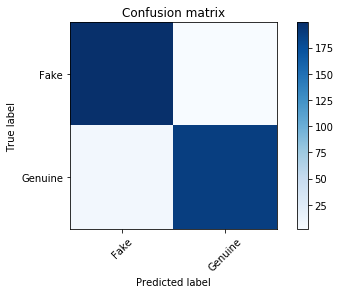

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, clf.predict(X_test))
print(cm)
plot_confusion_matrix(cm)

In [33]:
def plot_roc_curve(y_test, y_pred):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    print ("False Positive rate: ",false_positive_rate)
    print ("True Positive rate: ",true_positive_rate)
    
    roc_auc = auc(false_positive_rate, true_positive_rate)

    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

False Positive rate:  [0.         0.00995025 1.        ]
True Positive rate:  [0.         0.96410256 1.        ]


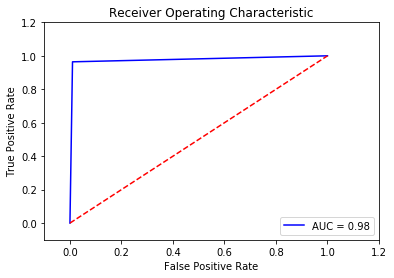

In [31]:
plot_roc_curve(y_test, clf.predict(X_test))

In [34]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       201
           1       0.99      0.96      0.98       195

    accuracy                           0.98       396
   macro avg       0.98      0.98      0.98       396
weighted avg       0.98      0.98      0.98       396

